<a href="https://colab.research.google.com/github/nbilasals/sentiment-qris/blob/main/20192020_labeling_using_BERT_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [ ]:
# from transformers import pipeline
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# pretrained= "mdhugol/indonesia-bert-sentiment-classification"

# model = AutoModelForSequenceClassification.from_pretrained(pretrained)
# tokenizer = AutoTokenizer.from_pretrained(pretrained)

# sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# label_index = {'LABEL_0': 'positive', 'LABEL_1': 'negative'}

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pos_text = "Maaf ya min, pakai qris uang kita makin hilang.\n"
# neg_text = "Berusaha hemat dgn ga ngambil uang cash banyak banyak, eh pas jajan bayarnya malah pake qris"

# result = sentiment_analysis(pos_text)
# status = label_index[result[0]['label']]
# score = result[0]['score']
# print(f'Text: {pos_text} | Label : {status} ({score * 100:.3f}%)')

# result = sentiment_analysis(neg_text)
# status = label_index[result[0]['label']]
# score = result[0]['score']
# print(f'Text: {neg_text} , Label : {status} ({score * 100:.3f}%)')

In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/menyala 🔥🔥/dataset/all data/qris_juni_aug20.csv')
df

,created_at,Komentar
0,2019-06-01 02:42:10+00:00,・・・ Ini Tujuan BI Luncurkan QR Code Standard I...
1,2019-06-01 07:42:43+00:00,@iam_realjayson @Poshfelly @kingsleynovich @Af...
2,2019-06-01 09:20:40+00:00,@bonario89 @iam_realjayson @Poshfelly @Realchu...
3,2019-06-01 11:22:21+00:00,@iam_realjayson @Poshfelly @Realchuka @kingsle...
4,2019-06-01 12:27:55+00:00,@iam_realjayson @Poshfelly @Realchuka @kingsle...
...,...,...
1176,2020-08-28 13:14:33+00:00,Bayar PBB Sragen sekarang ini bisa melalui QRI...
1177,2020-08-28 13:14:33+00:00,Bayar PBB Sragen sekarang ini bisa melalui QRI...
1178,2020-08-28 13:25:03+00:00,Sobat LinkAja sekarang kamu bisa melakukan sem...
1179,2020-08-28 13:25:03+00:00,Sobat LinkAja sekarang kamu bisa melakukan sem...


In [4]:
# Remove duplicate rows based on the 'full_text' column
df.drop_duplicates(subset=['Komentar'], keep='first', inplace=True)

# Print the DataFrame after removing duplicate
df

,created_at,Komentar
0,2019-06-01 02:42:10+00:00,・・・ Ini Tujuan BI Luncurkan QR Code Standard I...
1,2019-06-01 07:42:43+00:00,@iam_realjayson @Poshfelly @kingsleynovich @Af...
2,2019-06-01 09:20:40+00:00,@bonario89 @iam_realjayson @Poshfelly @Realchu...
3,2019-06-01 11:22:21+00:00,@iam_realjayson @Poshfelly @Realchuka @kingsle...
4,2019-06-01 12:27:55+00:00,@iam_realjayson @Poshfelly @Realchuka @kingsle...
...,...,...
1172,2020-08-28 11:35:49+00:00,Kini jajan dan makan di restoran favoritmu jad...
1175,2020-08-28 11:38:39+00:00,Guys biar dapet cb permata me itu kan katanya ...
1176,2020-08-28 13:14:33+00:00,Bayar PBB Sragen sekarang ini bisa melalui QRI...
1178,2020-08-28 13:25:03+00:00,Sobat LinkAja sekarang kamu bisa melakukan sem...


In [5]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "mdhugol/indonesia-bert-sentiment-classification"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# #Initialize the sentiment analysis pipeline with the pre-trained model and tokenize

# pretrained = "mdhugol/indonesia-bert-sentiment-classification"
# model = AutoModelForSequenceClassification.from_pretrained(pretrained)
# tokenizer = AutoTokenizer.from_pretrained(pretrained)

# sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [6]:
#Define a function to apply sentiment analysis to the DataFrame

def analyze_sentiment(text):
    result = sentiment_analysis(text)
    status = label_index[result[0]['label']]
    score = result[0]['score']
    return status, score

In [7]:
df[['Sentiment', 'Score']] = df['Komentar'].apply(lambda x: pd.Series(analyze_sentiment(x)))

In [8]:
df

,created_at,Komentar,Sentiment,Score
0,2019-06-01 02:42:10+00:00,・・・ Ini Tujuan BI Luncurkan QR Code Standard I...,neutral,0.991812
1,2019-06-01 07:42:43+00:00,@iam_realjayson @Poshfelly @kingsleynovich @Af...,neutral,0.444092
2,2019-06-01 09:20:40+00:00,@bonario89 @iam_realjayson @Poshfelly @Realchu...,neutral,0.490326
3,2019-06-01 11:22:21+00:00,@iam_realjayson @Poshfelly @Realchuka @kingsle...,neutral,0.467109
4,2019-06-01 12:27:55+00:00,@iam_realjayson @Poshfelly @Realchuka @kingsle...,neutral,0.411806
...,...,...,...,...
1172,2020-08-28 11:35:49+00:00,Kini jajan dan makan di restoran favoritmu jad...,neutral,0.865627
1175,2020-08-28 11:38:39+00:00,Guys biar dapet cb permata me itu kan katanya ...,neutral,0.558086
1176,2020-08-28 13:14:33+00:00,Bayar PBB Sragen sekarang ini bisa melalui QRI...,neutral,0.980064
1178,2020-08-28 13:25:03+00:00,Sobat LinkAja sekarang kamu bisa melakukan sem...,neutral,0.930115


In [9]:
# Count sentiment occurrences
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
neutral     810
positive     91
negative     26
Name: count, dtype: int64

In [ ]:
#2 ya??
# from transformers import AutoTokenizer, AutoModel

# tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
# model = AutoModelForSequenceClassification.from_pretrained("indolem/indobert-base-uncased")

# # Membuat pipeline untuk analisis sentimen
# sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# # Fungsi untuk menganalisis sentimen pada teks
# def analyze_sentiment(text):
#     result = sentiment_analysis(text)
#     status = result[0]['label']
#     score = result[0]['score']
#     return status, score

# # Gunakan fungsi analyze_sentiment pada DataFrame
# df[['Sentiment', 'Score']] = df['Komentar'].apply(lambda x: pd.Series(analyze_sentiment(x)))


In [ ]:
# df[['Sentiment', 'Score']] = df['Komentar'].apply(lambda x: pd.Series(analyze_sentiment(x)))

In [ ]:
# df['Sentiment'].replace({'LABEL_0': 'positive'}, inplace=True)
# df['Sentiment'].replace({'LABEL_1': 'negative'}, inplace=True)

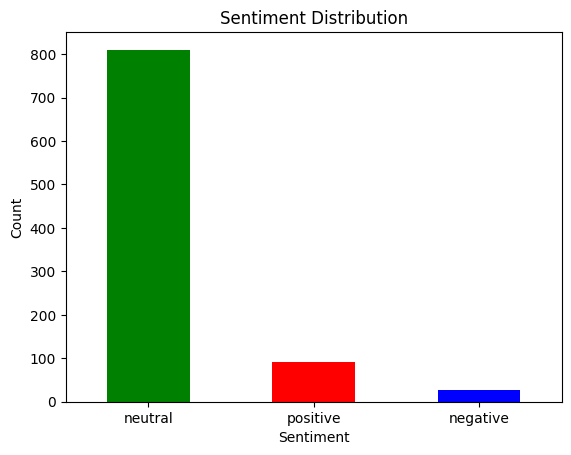

In [10]:
# Create a bar chart to visualize sentiment distribution
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

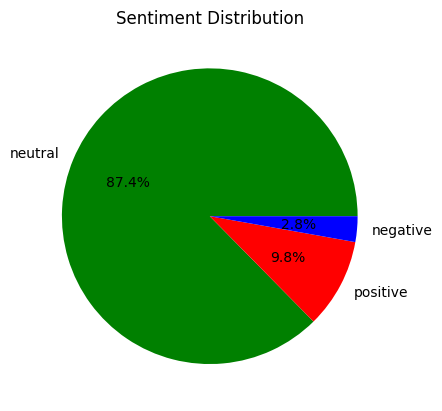

In [11]:
# Create a pie chart to visualize sentiment distribution
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [12]:
df[df['Sentiment'] == 'negative']

,created_at,Komentar,Sentiment,Score
59,2019-07-09 00:17:05+00:00,Sekitar hampir delapan tahun yang lalu tweet i...,negative,0.493792
71,2019-07-16 18:39:04+00:00,@Drenarh Pikin,negative,0.938849
100,2019-08-14 15:10:24+00:00,@iam_realjayson @chaigzy @AkiMarlin @HonNonny ...,negative,0.423697
141,2019-08-17 11:15:27+00:00,@MnBMs_ @IrfaanHakiim bully member aku lagi ak...,negative,0.995160
192,2019-08-19 11:51:12+00:00,@amirk Gegara QRIS ini kmrn berhasil membuat P...,negative,0.963907
261,2019-08-21 13:57:17+00:00,Barusan sedikit baca-baca standard teknis Univ...,negative,0.989761
407,2019-09-25 14:16:58+00:00,Kalau aku mau bahas lebih lanjut soal QRIS ini...,negative,0.586070
447,2019-11-02 07:12:40+00:00,Sistem udah siap tp UX masih gak ideal. Kl mau...,negative,0.565759
676,2020-02-26 14:42:15+00:00,Untuk pembayaran pake QR semua diwajibkan dise...,negative,0.919716
681,2020-03-08 04:59:24+00:00,Ovo = ribet krn hrs sebutkan nomor hp saat tra...,negative,0.890655


In [13]:
df[df['Sentiment'] == 'positive']

,created_at,Komentar,Sentiment,Score
22,2019-06-14 09:45:58+00:00,@maxfrank09 @iam_realjayson @AfamDeluxo @Dasuc...,positive,0.413970
34,2019-06-22 04:08:48+00:00,@euniceapril @amasna @alderina Yoih. Warung si...,positive,0.997065
60,2019-07-09 01:23:35+00:00,Menarik ini. LinkAja will be available on Go-J...,positive,0.889254
81,2019-07-28 11:41:35+00:00,@AjikesJournal Wawuuuuu,positive,0.993228
85,2019-08-02 16:59:46+00:00,@AdannaPapa @Eatndrown @Poshfelly @iam_realjay...,positive,0.472622
...,...,...,...,...
1126,2020-08-24 20:54:34+00:00,Wahh keren dong kalo e-commerce udah bisa pake...,positive,0.986536
1145,2020-08-26 07:34:05+00:00,Yeay! Sekarang kamu bisa jajan hemat dan murah...,positive,0.685449
1149,2020-08-26 12:32:39+00:00,Nah saat ini QRIS bisa digunakan untuk Gopay O...,positive,0.638481
1158,2020-08-27 06:10:07+00:00,Belanja apapun pasti aman tinggal scan #QRIS d...,positive,0.662339


In [14]:
df[df['Sentiment'] == 'neutral']

,created_at,Komentar,Sentiment,Score
0,2019-06-01 02:42:10+00:00,・・・ Ini Tujuan BI Luncurkan QR Code Standard I...,neutral,0.991812
1,2019-06-01 07:42:43+00:00,@iam_realjayson @Poshfelly @kingsleynovich @Af...,neutral,0.444092
2,2019-06-01 09:20:40+00:00,@bonario89 @iam_realjayson @Poshfelly @Realchu...,neutral,0.490326
3,2019-06-01 11:22:21+00:00,@iam_realjayson @Poshfelly @Realchuka @kingsle...,neutral,0.467109
4,2019-06-01 12:27:55+00:00,@iam_realjayson @Poshfelly @Realchuka @kingsle...,neutral,0.411806
...,...,...,...,...
1172,2020-08-28 11:35:49+00:00,Kini jajan dan makan di restoran favoritmu jad...,neutral,0.865627
1175,2020-08-28 11:38:39+00:00,Guys biar dapet cb permata me itu kan katanya ...,neutral,0.558086
1176,2020-08-28 13:14:33+00:00,Bayar PBB Sragen sekarang ini bisa melalui QRI...,neutral,0.980064
1178,2020-08-28 13:25:03+00:00,Sobat LinkAja sekarang kamu bisa melakukan sem...,neutral,0.930115


In [15]:
import pandas as pd

# Assuming 'your_dataframe' is the name of your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

# Save DataFrame to CSV
df.to_csv('/content/drive/MyDrive/menyala 🔥🔥/dataset/all data/labeled_qris_juni_aug20.csv', index=False)